In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# укажи свой путь и имя файла
file_path = "C:/Users/Артем/Desktop/Дома.xlsm"


In [3]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
df = pd.read_excel(file_path, engine="openpyxl")

# посмотреть первые строки
print(df.head())

  shortname_region formalname_region shortname_city formalname_city  \
0             Респ            Адыгея              г        Адыгейск   
1             Респ            Адыгея              г        Адыгейск   
2             Респ            Адыгея              г        Адыгейск   
3             Респ            Адыгея              г        Адыгейск   
4             Респ            Адыгея              г        Адыгейск   

                                          address  built_year  \
0                Респ. Адыгея, г. Адыгейск, д. 66         NaN   
1    Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7         NaN   
2   Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54         NaN   
3  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388         NaN   
4  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785      2008.0   

   exploitation_start_year project_type           house_type is_alarm  ...  \
0                      NaN          NaN                  NaN      Нет  ...   
1                      NaN

In [7]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [8]:
df.columns

Index(['shortname_region', 'formalname_region', 'shortname_city',
       'formalname_city', 'address', 'built_year', 'exploitation_start_year',
       'project_type', 'house_type', 'is_alarm', 'floor_count_max',
       'entrance_count', 'elevators_count', 'energy_efficiency', 'area_total',
       'area_residential', 'area_non_residential', 'foundation_type',
       'floor_type', 'wall_material', 'basement_area', 'chute_type',
       'chute_count', 'electrical_type', 'electrical_entries_count',
       'heating_type', 'hot_water_type', 'cold_water_type', 'sewerage_type',
       'sewerage_cesspools_volume', 'gas_type', 'ventilation_type',
       'firefighting_type', 'drainage_type', 'energy_efficiency_predict'],
      dtype='object')

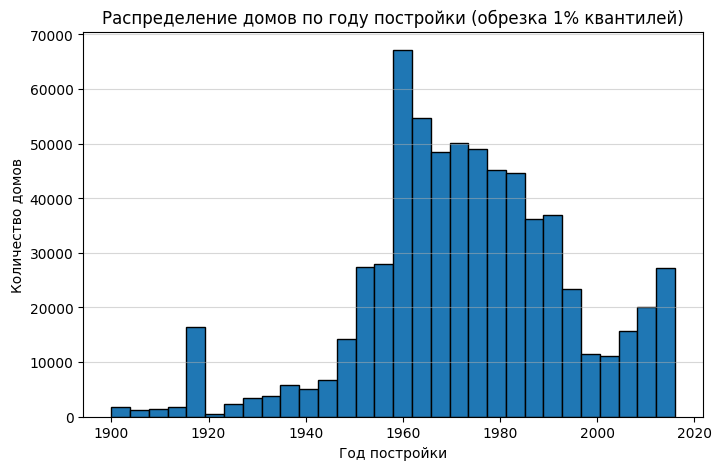

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["built_year"] >= low) & (df["built_year"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["built_year"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [10]:
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

avg_years = df.groupby("energy_efficiency")["built_year"].mean()
print(avg_years)

energy_efficiency
A      1986.439961
A+     2011.112540
A++    2003.127660
B      1994.390359
B+     2002.612018
B++    1977.093329
C      1991.621804
D      1971.334322
E      1969.762234
F      1963.611791
G      1968.026744
Name: built_year, dtype: float64


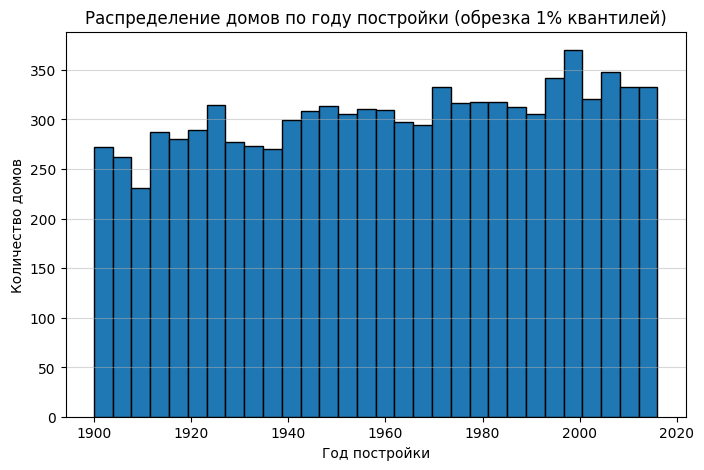

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["area_total"] = pd.to_numeric(df["area_total"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["area_total"] >= low) & (df["area_total"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["area_total"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [12]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [13]:
df_cut = df[['formalname_region', 'built_year', 'energy_efficiency', 'area_total']]

In [14]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
0,Адыгея,NaN,C,8.0
1,Адыгея,NaN,C,NaN
2,Адыгея,NaN,F,7890.0
3,Адыгея,NaN,C,NaN
4,Адыгея,2008.0,B++,76.7
...,...,...,...,...
1026337,Севастополь,1946.0,C,614.2
1026338,Севастополь,1950.0,C,348.1
1026339,Севастополь,1955.0,C,632.5
1026340,Севастополь,2018.0,A,2203.4


In [15]:
regions = [
    "Алтайский",
    "Иркутская",
    "Кемеровская",
    "Красноярский",
    "Новосибирская",
    "Омская",
    "Алтай",
    "Тыва",
    "Хакасия",
    "Томская"
]

df_cut = df_cut[df_cut["formalname_region"].isin(regions)]

In [16]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
18353,Томская,NaN,B++,8949.0
25028,Алтай,NaN,C,NaN
25029,Алтай,1957.0,E,230.0
25030,Алтай,NaN,C,NaN
25031,Алтай,NaN,C,NaN
...,...,...,...,...
994607,Томская,1981.0,A,4383.2
994608,Томская,1983.0,A,4384.0
994609,Томская,1985.0,A,4377.8
994610,Томская,1987.0,A,4350.9


In [17]:
df_cut.isna().sum()

formalname_region        0
built_year           45518
energy_efficiency        0
area_total           25906
dtype: int64

In [18]:
df_cut_cleaned = df_cut.dropna()


In [19]:
coeffs = {
    "A++": 0.4,
    "A+": 0.5,
    "A": 0.6,
    "B++": 0.63,
    "B+": 0.66,
    "B": 0.7,
    "C": 0.85,
    "D": 1,
    "E": 1.25,
    "F": 1.5,
    "G": 1.75
}

# создаём новый столбец
df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


C:\Users\Артем\AppData\Local\Temp\ipykernel_14640\2022551181.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


In [20]:
df_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_total,area_eff
25029,Алтай,1957.0,E,230.0,287.50
25036,Алтай,2009.0,D,4392.0,4392.00
25037,Алтай,2009.0,C,6666.0,5666.10
25039,Алтай,1988.0,D,2216.3,2216.30
25040,Алтай,1988.0,D,1509.8,1509.80
...,...,...,...,...,...
994607,Томская,1981.0,A,4383.2,2629.92
994608,Томская,1983.0,A,4384.0,2630.40
994609,Томская,1985.0,A,4377.8,2626.68
994610,Томская,1987.0,A,4350.9,2610.54


In [21]:
df_filtered_cut_cleaned = (
    df_cut_cleaned
    .groupby(["formalname_region", "built_year", "energy_efficiency"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)


In [22]:
df_filtered_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_eff
0,Алтай,1500.0,E,1312.375
1,Алтай,1895.0,E,1090.375
2,Алтай,1933.0,F,906.450
3,Алтай,1934.0,D,1414.300
4,Алтай,1935.0,E,1511.125
...,...,...,...,...
4326,Хакасия,2017.0,B,25874.730
4327,Хакасия,2017.0,B+,10110.012
4328,Хакасия,2017.0,C,4141.370
4329,Хакасия,2018.0,C,1999.115


In [23]:
import pandas as pd

# группировка и сумма по срезу
df_grouped = (
    df_filtered_cut_cleaned
    .groupby(["formalname_region", "built_year"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)

# накопительная сумма по региону (и при желании — по energy_efficiency отдельно)
df_grouped["area_eff_cumsum"] = (
    df_grouped
    .groupby(["formalname_region"])["area_eff"]
    .cumsum()
)

df_grouped


,formalname_region,built_year,area_eff,area_eff_cumsum
0,Алтай,1500.0,1312.3750,1.312375e+03
1,Алтай,1895.0,1090.3750,2.402750e+03
2,Алтай,1933.0,906.4500,3.309200e+03
3,Алтай,1934.0,1414.3000,4.723500e+03
4,Алтай,1935.0,1511.1250,6.234625e+03
...,...,...,...,...
1055,Хакасия,2015.0,98410.6922,7.461583e+06
1056,Хакасия,2016.0,53851.2390,7.515434e+06
1057,Хакасия,2017.0,40126.1120,7.555560e+06
1058,Хакасия,2018.0,1999.1150,7.557559e+06


In [24]:
df_grouped.head()

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Алтай,1500.0,1312.375,1312.375
1,Алтай,1895.0,1090.375,2402.750
2,Алтай,1933.0,906.450,3309.200
3,Алтай,1934.0,1414.300,4723.500
4,Алтай,1935.0,1511.125,6234.625


In [25]:
import pandas as pd

data_climate = {
    "Год": list(range(1960, 2061)),
    "Зима": [
    -24.27, -24.54, -24.74, -24.73, -24.59, -25.44, -24.69, -25.57, -24.74, -25.18,
    -24.29, -24.34, -24.91, -24.94, -24.70, -24.57, -25.05, -25.03, -24.51, -24.95,
    -23.99, -24.52, -24.58, -25.12, -25.63, -24.45, -24.16, -23.98, -24.50, -24.24,
    -23.70, -23.91, -23.91, -24.25, -24.54, -24.71, -23.59, -23.80, -23.53, -24.54,
    -23.39, -23.65, -23.07, -22.36, -23.55, -23.39, -22.76, -23.50, -22.91, -23.61,
    -23.28, -22.95, -23.50, -22.53, -23.33, -22.93, -22.15, -22.13, -22.52, -22.36,
    -22.55, -22.96, -21.81, -22.51, -22.46, -22.51, -22.31, -21.63, -21.61, -21.67,
    -22.18, -21.55, -21.78, -21.51, -21.66, -21.37, -21.35, -21.68, -21.49, -20.85,
    -20.75, -21.10, -21.15, -21.01, -21.20, -21.45, -21.23, -20.54, -20.47, -20.91,
    -20.27, -20.31, -20.52, -20.24, -20.18, -20.79, -20.02, -20.95, -20.26, -20.09,
    -19.97
]
}

df_sfo_climate = pd.DataFrame(data_climate)
df_sfo_climate

,Год,Зима
0,1960,-24.27
1,1961,-24.54
2,1962,-24.74
3,1963,-24.73
4,1964,-24.59
...,...,...
96,2056,-20.02
97,2057,-20.95
98,2058,-20.26
99,2059,-20.09


In [26]:

data_region_heat = {
    "Республика Алтай": [
        167.6, 182.5, 180.1, 199.9, 188.6, 196.6, 190.2, 170.1, 178.3, 173.3,
        165.4, 144.3, 149.1, 139.5, 153.4, 146.2, 153.5, 148.5, 161.4, 156.57,
        135.41, 149.34, 148.1, 142.5, 143.5
    ],
    "Республика Тыва": [
        512.5, 450.7, 451.2, 485.7, 519.9, 528.5, 534.2, 550.9, 566.4, 561.2,
        549.5, 507.4, 511.2, 499.4, 501.8, 499.3, 495.2, 517.6, 518.1, 522.78,
        520.21, 567.29, 553.0, 553.0, 528.6
    ],
    "Республика Хакасия": [
        1946.2, 1863.9, 1745.8, 1928.6, 1929.3, 2038.0, 1991.8, 1801.3, 2049.0,
        2010.2, 1928.4, 1741.7, 1745.7, 1654.1, 1695.4, 1648.5, 1735.3, 1693.6,
        1772.6, 1631.8, 1571.7, 1709.7, 1734.1, 1725.4, 1748.1
    ],
    "Алтайский край": [
        7346.6, 7524.9, 7538.0, 7777.6, 7691.2, 7216.8, 7270.2, 6681.1, 7123.3,
        6636.4, 6354.8, 5979.8, 5776.9, 4770.4, 5401.4, 5321.9, 5418.1, 5481.6,
        5631.5, 5423.84, 5100.22, 5617.39, 5451.2, 5467.0, 5533.0
    ],
    "Красноярский край": [
        18211.2, 17914.1, 16938.5, 16957.8, 15741.4, 13989.6, 16544.6, 14921.1,
        16059.1, 15673.3, 16880.3, 15862.5, 15786.2, 14369.9, 14864.2, 15850.6,
        14557.7, 14119.1, 14478.4, 14103.57, 13380.41, 14098.43, 13989.0, 13935.2, 13782.7
    ],
    "Иркутская область": [
        15345.7, 13312.2, 12251.9, 11930.3, 13127.8, 12727.4, 12616.4, 11468.1,
        13759.4, 12502.4, 12817.3, 11908.2, 11948.8, 11552.2, 10492.3, 10545.3,
        10599.2, 10330.5, 10877.6, 10957.09, 11616.49, 11354.31, 10911.0, 10881.2, 10577.8
    ],
    "Кемеровская область": [
        15761.9, 14703.7, 14044.6, 14363.4, 14681.0, 14557.8, 14404.2, 13941.7,
        14206.4, 14785.3, 15039.6, 15351.7, 12835.8, 12735.2, 12698.2, 11285.4,
        11654.3, 11440.7, 11700.6, 11258.64, 11199.88, 11509.23, 11342.6, 11185.3, 11042.8
    ],
    "Новосибирская область": [
        17818.9, 19260.8, 18449.0, 19615.9, 11970.7, 12220.5, 12190.0, 11478.3,
        12236.4, 12617.8, 12559.0, 11856.1, 11384.0, 10799.3, 10653.3, 10205.5,
        10538.4, 9984.5, 10656.2, 10085.1, 9786.78, 10593.93, 10917.9, 10533.3, 10510.6
    ],
    "Омская область": [
        9442.1, 7982.3, 9101.9, 7152.4, 7648.5, 7119.1, 7179.0, 7118.8, 7443.3,
        7537.6, 7248.0, 6959.5, 6965.9, 6923.6, 6990.7, 6790.1, 6773.8, 6804.8,
        6939.6, 6862.76, 6520.1, 7008.56, 6786.8, 6647.7, 6871.1
    ],
    "Томская область": [
        5910.6, 5543.1, 5147.2, 5208.2, 4880.6, 4621.0, 4631.4, 4377.4, 4598.6,
        4782.4, 4923.7, 4390.1, 4623.2, 4302.0, 4422.4, 4144.8, 4117.9, 3959.2,
        4363.1, 3991.13, 3794.97, 4125.95, 4010.5, 3942.7, 4035.9
    ]
}


years = list(range(2000, 2025))  # 2000–2024
df_region_heat = pd.DataFrame(data_region_heat, index=years)

df_region_heat.T

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Республика Алтай,167.6,182.5,180.1,199.9,188.6,196.6,190.2,170.1,178.3,173.3,...,146.2,153.5,148.5,161.4,156.57,135.41,149.34,148.1,142.5,143.5
Республика Тыва,512.5,450.7,451.2,485.7,519.9,528.5,534.2,550.9,566.4,561.2,...,499.3,495.2,517.6,518.1,522.78,520.21,567.29,553.0,553.0,528.6
Республика Хакасия,1946.2,1863.9,1745.8,1928.6,1929.3,2038.0,1991.8,1801.3,2049.0,2010.2,...,1648.5,1735.3,1693.6,1772.6,1631.80,1571.70,1709.70,1734.1,1725.4,1748.1
Алтайский край,7346.6,7524.9,7538.0,7777.6,7691.2,7216.8,7270.2,6681.1,7123.3,6636.4,...,5321.9,5418.1,5481.6,5631.5,5423.84,5100.22,5617.39,5451.2,5467.0,5533.0
Красноярский край,18211.2,17914.1,16938.5,16957.8,15741.4,13989.6,16544.6,14921.1,16059.1,15673.3,...,15850.6,14557.7,14119.1,14478.4,14103.57,13380.41,14098.43,13989.0,13935.2,13782.7
Иркутская область,15345.7,13312.2,12251.9,11930.3,13127.8,12727.4,12616.4,11468.1,13759.4,12502.4,...,10545.3,10599.2,10330.5,10877.6,10957.09,11616.49,11354.31,10911.0,10881.2,10577.8
Кемеровская область,15761.9,14703.7,14044.6,14363.4,14681.0,14557.8,14404.2,13941.7,14206.4,14785.3,...,11285.4,11654.3,11440.7,11700.6,11258.64,11199.88,11509.23,11342.6,11185.3,11042.8
Новосибирская область,17818.9,19260.8,18449.0,19615.9,11970.7,12220.5,12190.0,11478.3,12236.4,12617.8,...,10205.5,10538.4,9984.5,10656.2,10085.10,9786.78,10593.93,10917.9,10533.3,10510.6
Омская область,9442.1,7982.3,9101.9,7152.4,7648.5,7119.1,7179.0,7118.8,7443.3,7537.6,...,6790.1,6773.8,6804.8,6939.6,6862.76,6520.10,7008.56,6786.8,6647.7,6871.1
Томская область,5910.6,5543.1,5147.2,5208.2,4880.6,4621.0,4631.4,4377.4,4598.6,4782.4,...,4144.8,4117.9,3959.2,4363.1,3991.13,3794.97,4125.95,4010.5,3942.7,4035.9


In [27]:
df_grouped

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Алтай,1500.0,1312.3750,1.312375e+03
1,Алтай,1895.0,1090.3750,2.402750e+03
2,Алтай,1933.0,906.4500,3.309200e+03
3,Алтай,1934.0,1414.3000,4.723500e+03
4,Алтай,1935.0,1511.1250,6.234625e+03
...,...,...,...,...
1055,Хакасия,2015.0,98410.6922,7.461583e+06
1056,Хакасия,2016.0,53851.2390,7.515434e+06
1057,Хакасия,2017.0,40126.1120,7.555560e+06
1058,Хакасия,2018.0,1999.1150,7.557559e+06


In [28]:
df_merged = df_grouped.merge(
    df_sfo_climate.rename(columns={"Год": "built_year", "Зима": "climate_winter"}),
    on="built_year",
    how="left"
)

In [29]:
df_merged

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter
0,Алтай,1500.0,1312.3750,1.312375e+03,NaN
1,Алтай,1895.0,1090.3750,2.402750e+03,NaN
2,Алтай,1933.0,906.4500,3.309200e+03,NaN
3,Алтай,1934.0,1414.3000,4.723500e+03,NaN
4,Алтай,1935.0,1511.1250,6.234625e+03,NaN
...,...,...,...,...,...
1055,Хакасия,2015.0,98410.6922,7.461583e+06,-22.93
1056,Хакасия,2016.0,53851.2390,7.515434e+06,-22.15
1057,Хакасия,2017.0,40126.1120,7.555560e+06,-22.13
1058,Хакасия,2018.0,1999.1150,7.557559e+06,-22.52


In [30]:
import re
# функция для очистки названий
def clean_region_name(name: str) -> str:
    
    # Убираем "Республика ..." в начале
    name = re.sub(r"^Республика\s+", "", name, flags=re.IGNORECASE)
    
    # Убираем "область" в конце
    name = re.sub(r"\s+область$", "", name, flags=re.IGNORECASE)
    
    # Убираем "автономный округ" в конце
    name = re.sub(r"\s+авт\.?\.?\s*округ$", "", name, flags=re.IGNORECASE)
    
    # Убираем "край" в конце
    name = re.sub(r"\s+край$", "", name, flags=re.IGNORECASE)
    
    # Чистим лишние пробелы
    name = " ".join(name.split())
    
    return name

# применяем к df_region_heat
df_heat_long = (
    df_region_heat
    .reset_index(names="built_year")
    .melt(id_vars="built_year", var_name="formalname_region", value_name="heat")
)

df_heat_long["formalname_region"] = df_heat_long["formalname_region"].apply(clean_region_name)

# то же самое для df_merged
df_merged["formalname_region"] = df_merged["formalname_region"].apply(clean_region_name)

# теперь мерж
df_final = df_merged.merge(
    df_heat_long,
    on=["formalname_region", "built_year"],
    how="left"
)

df_final


,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
0,Алтай,1500.0,1312.3750,1.312375e+03,NaN,NaN
1,Алтай,1895.0,1090.3750,2.402750e+03,NaN,NaN
2,Алтай,1933.0,906.4500,3.309200e+03,NaN,NaN
3,Алтай,1934.0,1414.3000,4.723500e+03,NaN,NaN
4,Алтай,1935.0,1511.1250,6.234625e+03,NaN,NaN
...,...,...,...,...,...,...
1055,Хакасия,2015.0,98410.6922,7.461583e+06,-22.93,1648.5
1056,Хакасия,2016.0,53851.2390,7.515434e+06,-22.15,1735.3
1057,Хакасия,2017.0,40126.1120,7.555560e+06,-22.13,1693.6
1058,Хакасия,2018.0,1999.1150,7.557559e+06,-22.52,1772.6


In [31]:
df_final

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
0,Алтай,1500.0,1312.3750,1.312375e+03,NaN,NaN
1,Алтай,1895.0,1090.3750,2.402750e+03,NaN,NaN
2,Алтай,1933.0,906.4500,3.309200e+03,NaN,NaN
3,Алтай,1934.0,1414.3000,4.723500e+03,NaN,NaN
4,Алтай,1935.0,1511.1250,6.234625e+03,NaN,NaN
...,...,...,...,...,...,...
1055,Хакасия,2015.0,98410.6922,7.461583e+06,-22.93,1648.5
1056,Хакасия,2016.0,53851.2390,7.515434e+06,-22.15,1735.3
1057,Хакасия,2017.0,40126.1120,7.555560e+06,-22.13,1693.6
1058,Хакасия,2018.0,1999.1150,7.557559e+06,-22.52,1772.6


In [32]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# фильтруем данные с 2000 года
df_norm = df_final[df_final["built_year"] >= 2000].copy()

# выбираем только нужные столбцы
cols_to_scale = ["area_eff_cumsum", "climate_winter"]

scaler = MinMaxScaler()
df_norm[cols_to_scale] = scaler.fit_transform(df_norm[cols_to_scale])

print(df_norm[["built_year", "formalname_region", "area_eff_cumsum", "climate_winter"]].head())


    built_year formalname_region  area_eff_cumsum  climate_winter
47      2000.0             Алтай         0.000000        0.141304
48      2001.0             Алтай         0.000039        0.000000
49      2003.0             Алтай         0.000129        0.701087
50      2004.0             Алтай         0.000154        0.054348
51      2005.0             Алтай         0.000226        0.141304


In [33]:
df_norm

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
47,Алтай,2000.0,3404.4200,0.000000,0.141304,167.6
48,Алтай,2001.0,2384.0880,0.000039,0.000000,182.5
49,Алтай,2003.0,5415.5100,0.000129,0.701087,199.9
50,Алтай,2004.0,1550.0000,0.000154,0.054348,188.6
51,Алтай,2005.0,4323.5000,0.000226,0.141304,196.6
...,...,...,...,...,...,...
1055,Хакасия,2015.0,98410.6922,0.115822,0.391304,1648.5
1056,Хакасия,2016.0,53851.2390,0.116710,0.815217,1735.3
1057,Хакасия,2017.0,40126.1120,0.117372,0.826087,1693.6
1058,Хакасия,2018.0,1999.1150,0.117405,0.614130,1772.6


Intercept: -8521.409011651629
Coef area_eff_cumsum: 0.00011438402225871407
Coef climate_winter: -567.7338318188254


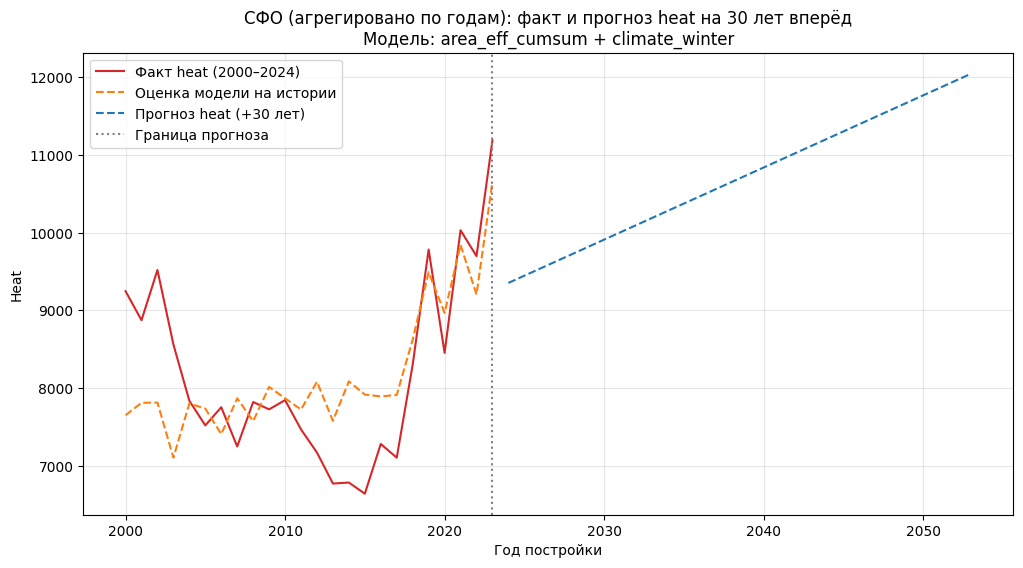

    built_year          heat  area_eff_cumsum  climate_winter     heat_pred  \
14      2014.0   6787.310000     2.940542e+07      -23.330000   8087.331835   
15      2015.0   6643.760000     2.990923e+07      -22.930000   7917.865943   
16      2016.0   7283.133333     3.357070e+07      -22.150000   7893.847499   
17      2017.0   7106.944444     3.384450e+07      -22.130000   7913.811214   
18      2018.0   8302.450000     3.811986e+07      -22.520000   8624.260211   
19      2019.0   9781.833333     4.648546e+07      -22.360000   9490.313140   
20      2020.0   8453.654286     4.097199e+07      -22.550000   8967.530017   
21      2021.0  10030.308333     4.658100e+07      -22.960000   9841.881514   
22      2022.0   9697.500000     4.671174e+07      -21.810000   9203.942681   
23      2023.0  11185.300000     5.591800e+07      -22.510000  10654.405718   
24      2024.0   9352.740761     4.552047e+07      -22.312101           NaN   
25      2025.0   9445.451717     4.656609e+07      -

In [34]:
#СФО: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
)

# 2) интерполяция пропусков
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
    .interpolate(method="linear")
)

# 3) обучение регрессии
X = df_yearly[["area_eff_cumsum", "climate_winter"]]
y = df_yearly["heat"]

reg = LinearRegression()
reg.fit(X, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum:", reg.coef_[0])
print("Coef climate_winter:", reg.coef_[1])

# 4) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейная экстраполяция признаков
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

# 5) прогноз и история
df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

df_all = pd.concat(
    [
        df_yearly.assign(type="Факт"),
        future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
    ],
    ignore_index=True
)

# 6) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("СФО (агрегировано по годам): факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 7) таблица
print(df_all.tail(40))  # последние 40 лет (факт + прогноз)


Базовая регрессия:
Intercept: 16687.205701434585
Coef area_eff_cumsum: -0.0002895250800430098
Coef climate_winter: 40.08652676578375

Неверные знаки, применяем жёсткую регрессию...
Жёсткая модель:
Intercept: 1.4187579637828094
Coef area_eff_cumsum: 0.0
Coef climate_winter: -343.2283407806591
R2 жёсткой модели: -0.0060104106493437115


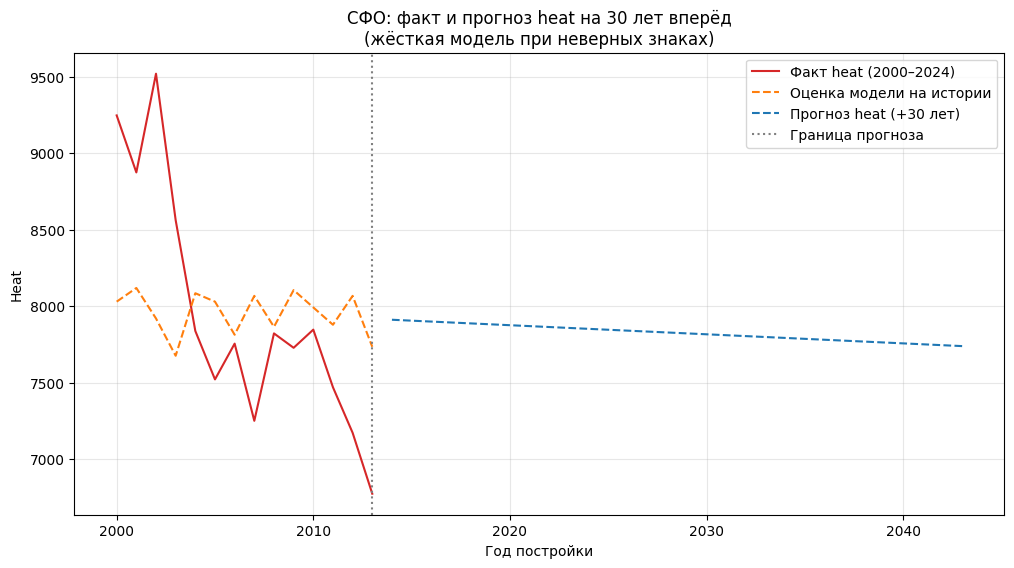

    built_year         heat    heat_pred     type
4       2004.0  7837.900000  8084.446183     Факт
5       2005.0  7521.530000  8029.529649     Факт
6       2006.0  7755.200000  7813.295794     Факт
7       2007.0  7250.880000  8067.284766     Факт
8       2008.0  7822.020000  7864.780045     Факт
9       2009.0  7727.990000  8105.039884     Факт
10      2010.0  7846.600000  7991.774531     Факт
11      2011.0  7470.130000  7878.509179     Факт
12      2012.0  7172.680000  8067.284766     Факт
13      2013.0  6774.560000  7734.353276     Факт
14      2014.0  7911.210165          NaN  Прогноз
15      2015.0  7905.273446          NaN  Прогноз
16      2016.0  7899.336727          NaN  Прогноз
17      2017.0  7893.400008          NaN  Прогноз
18      2018.0  7887.463290          NaN  Прогноз
19      2019.0  7881.526571          NaN  Прогноз
20      2020.0  7875.589852          NaN  Прогноз
21      2021.0  7869.653133          NaN  Прогноз
22      2022.0  7863.716415          NaN  Прогноз


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from sklearn.metrics import r2_score

# ===== 0) Фильтр по годам и агрегация =====
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2013)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
)
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = df_yearly[["heat", "area_eff_cumsum", "climate_winter"]].interpolate(method="linear")

# ===== 1) Базовая линейная регрессия =====
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
y = df_yearly["heat"].values

reg = LinearRegression()
reg.fit(X, y)
coefs_base = reg.coef_
intercept_base = reg.intercept_

print("Базовая регрессия:")
print("Intercept:", intercept_base)
print("Coef area_eff_cumsum:", coefs_base[0])
print("Coef climate_winter:", coefs_base[1])

# ===== 2) Проверяем знаки и при необходимости применяем жёсткую модель =====
# ожидаем: area >=0, climate <=0
apply_hard = False
if coefs_base[0] < 0 or coefs_base[1] > 0:
    apply_hard = True
    print("\nНеверные знаки, применяем жёсткую регрессию...")

if apply_hard:
    def mse_beta(beta, X, y):
        return np.mean((y - X @ beta) ** 2)
    
    bounds = [(0, None),    # area_eff_cumsum >=0
              (None, 0)]    # climate_winter <=0
    
    res = minimize(mse_beta, coefs_base, args=(X, y), bounds=bounds, method="L-BFGS-B")
    beta_fixed = res.x
    intercept_fixed = np.mean(y) - np.mean(X @ beta_fixed)
    
    y_pred = intercept_fixed + X @ beta_fixed
    print("Жёсткая модель:")
    print("Intercept:", intercept_fixed)
    print("Coef area_eff_cumsum:", beta_fixed[0])
    print("Coef climate_winter:", beta_fixed[1])
    r2_model = r2_score(y, y_pred)
    print("R2 жёсткой модели:", r2_model)
else:
    beta_fixed = coefs_base
    intercept_fixed = intercept_base
    y_pred = reg.predict(X)
    r2_model = r2_score(y, y_pred)
    print("R2 базовой модели:", r2_model)

# ===== 3) Сохраняем предсказания на истории =====
df_yearly["heat_pred"] = y_pred

# ===== 4) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = intercept_fixed + future_data[["area_eff_cumsum", "climate_winter"]].values @ beta_fixed
future_data["type"] = "Прогноз"

# ===== 5) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat", "heat_pred"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat_pred", "type"]].rename(columns={"heat_pred":"heat"})],
                   ignore_index=True).sort_values("built_year")

# ===== 6) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("СФО: факт и прогноз heat на 30 лет вперёд\n(жёсткая модель при неверных знаках)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ===== 7) Таблица =====
print(df_all.tail(40))


Intercept: 7892.351579743009
Coef area_eff_cumsum (std): 359.40991631526464
Coef climate_winter (std): -194.0604204683065


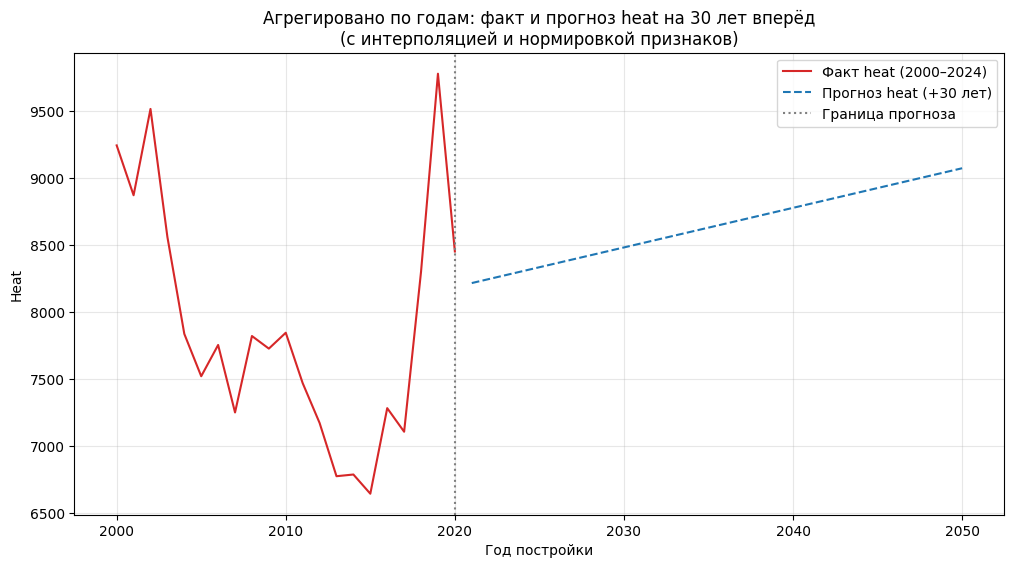

In [36]:
#СФО: регрессия на нормированных данных + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 0) гарантируем числовые типы
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

# 1) агрегация по годам (2000–2024) и снятие возможных дублей лет
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2020)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
            .sort_values("built_year")
)

# на всякий случай удалим дубликаты лет (хотя groupby уже их схлопывает)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")

# 2) ставим годы индексом, интерполируем по индексу, возвращаем столбец лет
df_yearly = df_yearly.set_index("built_year")
df_yearly = df_yearly.interpolate(method="index")  # линейно по оси лет
df_yearly = df_yearly.reset_index()

# 3) нормировка признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
y = df_yearly["heat"].values

# 4) модель
reg = LinearRegression()
reg.fit(X_scaled, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum (std):", reg.coef_[0])
print("Coef climate_winter (std):", reg.coef_[1])

# 5) предсказание на истории
df_yearly["heat_pred"] = reg.predict(X_scaled)

# 6) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейные тренды для признаков по истории
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

# масштабируем будущее — строго в том же порядке колонок:
future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area,
                  "climate_winter": future_climate})
)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": reg.predict(future_scaled),
    "type": "Прогноз"
})

# 7) итоговая таблица факт+прогноз (с правильной меткой type)
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"

df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# 8) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Агрегировано по годам: факт и прогноз heat на 30 лет вперёд\n(с интерполяцией и нормировкой признаков)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


R2 базовой модели: 0.0699
Базовые коэффициенты: [-203.56670135  -11.27489912] Intercept: 7763.362923976609
R2 жёсткой модели: 0.0294
Финальные коэффициенты с фиксированными знаками: [   0.         -136.92783473] Intercept: 7763.362923976609


C:\Users\Артем\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


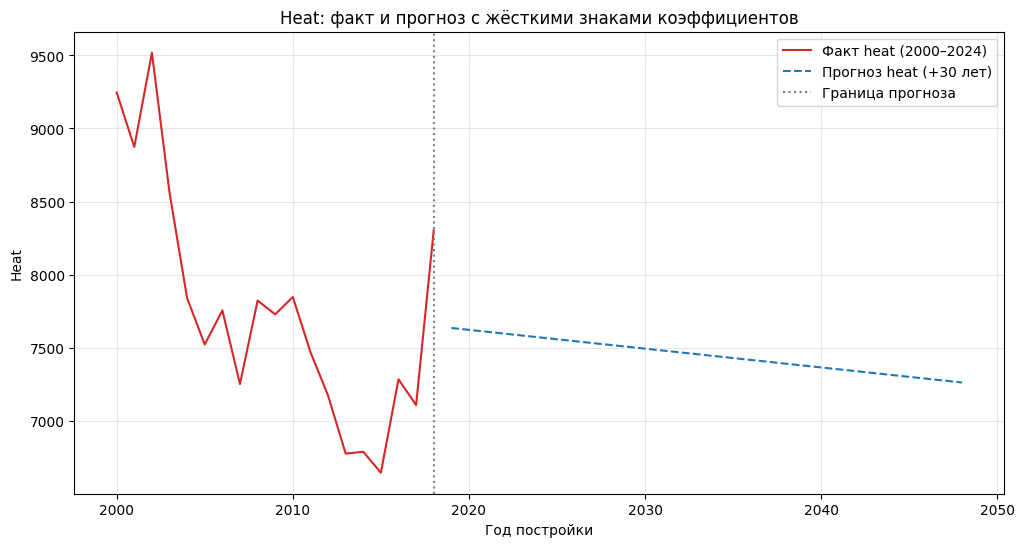

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.optimize import minimize

# ===== 0) Подготовка данных =====
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2018)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
            .sort_values("built_year")
)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()

# ===== 1) Нормировка признаков =====
scaler = StandardScaler()
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
X_scaled = scaler.fit_transform(X)
y = df_yearly["heat"].values

# ===== 2) Базовая линейная регрессия =====
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_scaled, y)
y_pred_base = reg.predict(X_scaled)
r2_base = r2_score(y, y_pred_base)
print(f"R2 базовой модели: {r2_base:.4f}")
print("Базовые коэффициенты:", reg.coef_, "Intercept:", reg.intercept_)

# ===== 3) Жёсткое закрепление знаков =====
def mse_beta(beta, X, y):
    """Функция потерь (MSE)"""
    return np.mean((y - X @ beta) ** 2)

# Bounds: area >=0, climate <=0
bounds = [(0, None),  # area_eff_cumsum >= 0
          (None, 0)]  # climate_winter <= 0

res = minimize(mse_beta, reg.coef_, args=(X_scaled, y), bounds=bounds, method="L-BFGS-B")
beta_fixed = res.x
intercept_fixed = np.mean(y) - np.mean(X_scaled @ beta_fixed)

y_pred_fixed = intercept_fixed + X_scaled @ beta_fixed
r2_fixed = r2_score(y, y_pred_fixed)
print(f"R2 жёсткой модели: {r2_fixed:.4f}")
print("Финальные коэффициенты с фиксированными знаками:", beta_fixed, "Intercept:", intercept_fixed)

# ===== 4) Сохраняем предсказание на истории =====
df_yearly["heat_pred"] = y_pred_fixed

# ===== 5) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area_trend = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim_trend = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area_trend)
clim_trend = np.poly1d(coef_clim_trend)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area, "climate_winter": future_climate})
)
future_heat = intercept_fixed + future_scaled @ beta_fixed

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": future_heat,
    "type": "Прогноз"
})

# ===== 6) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# ===== 7) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Heat: факт и прогноз с жёсткими знаками коэффициентов")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


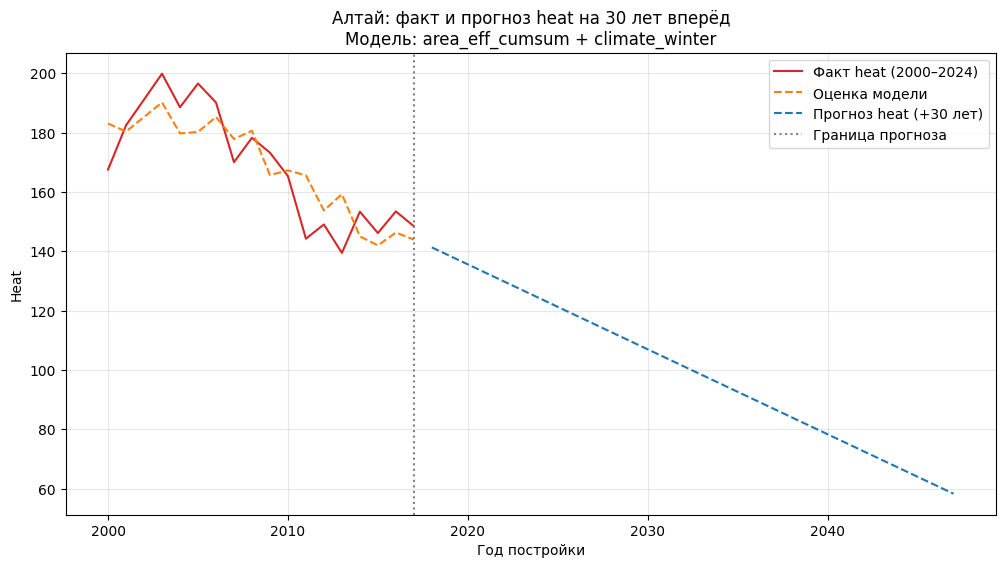

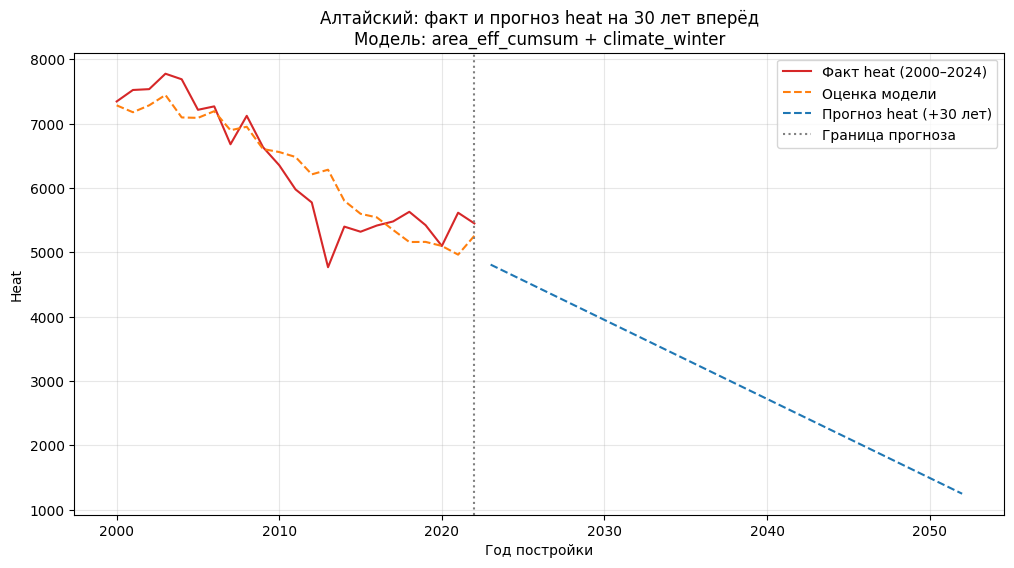

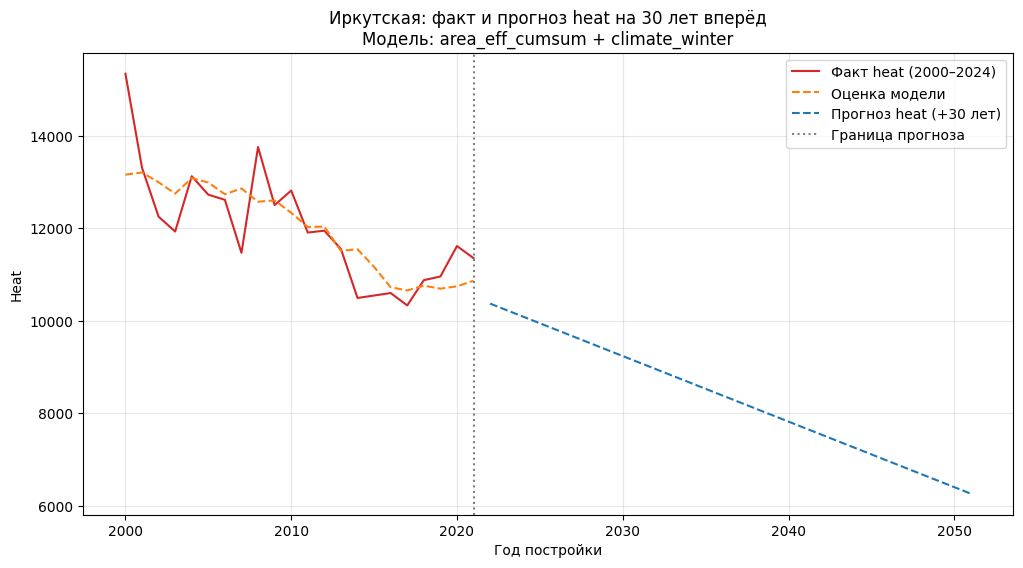

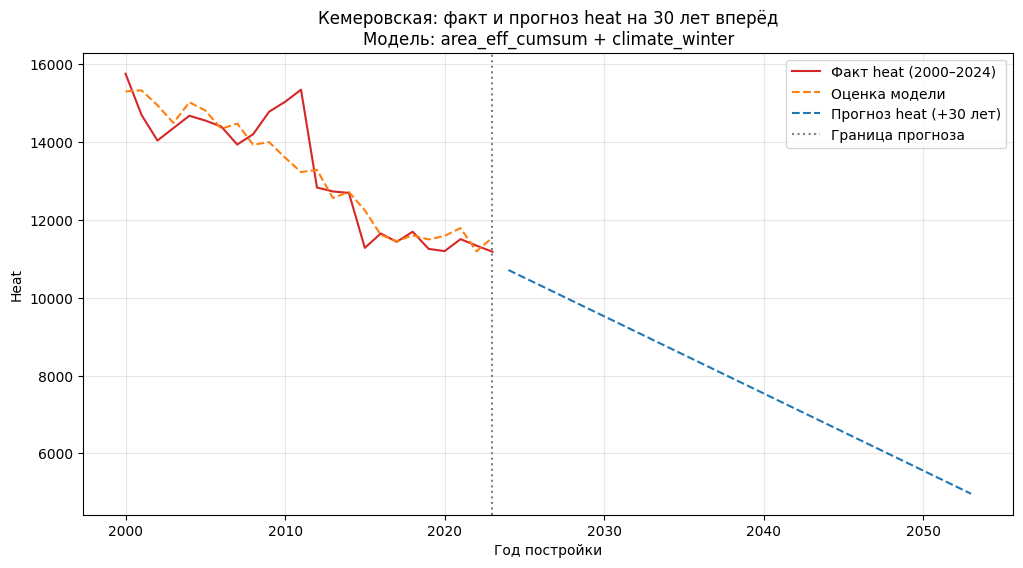

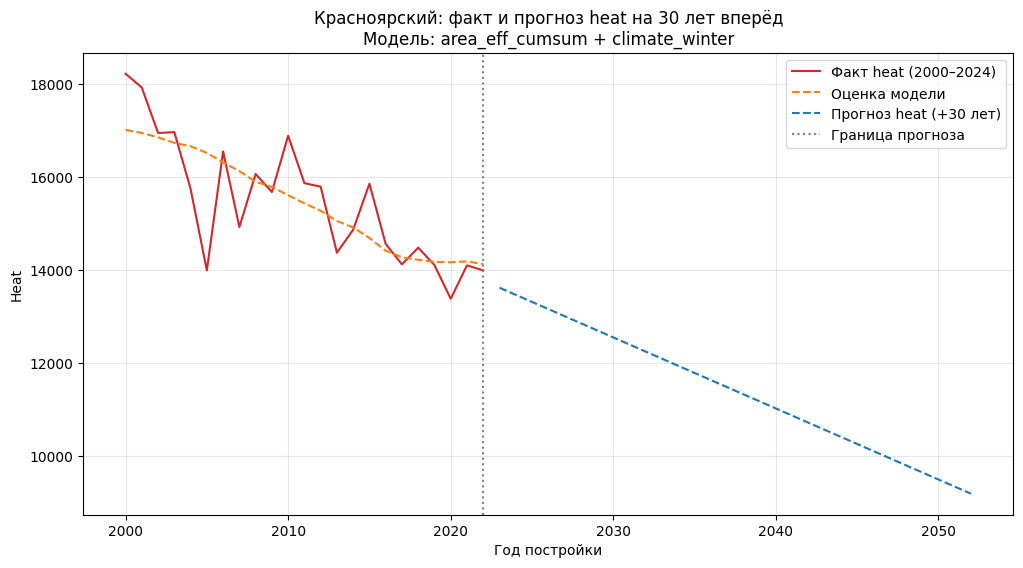

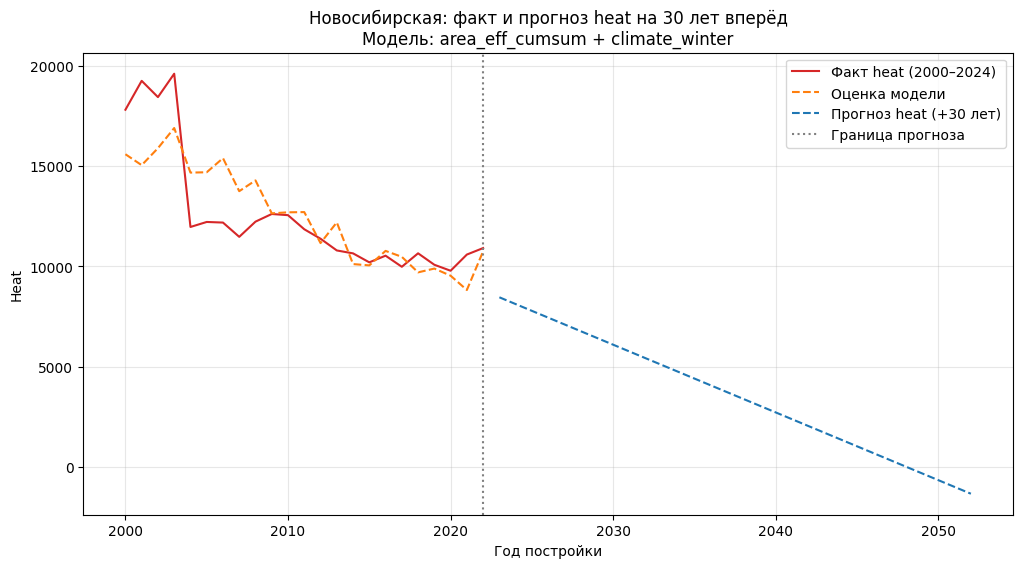

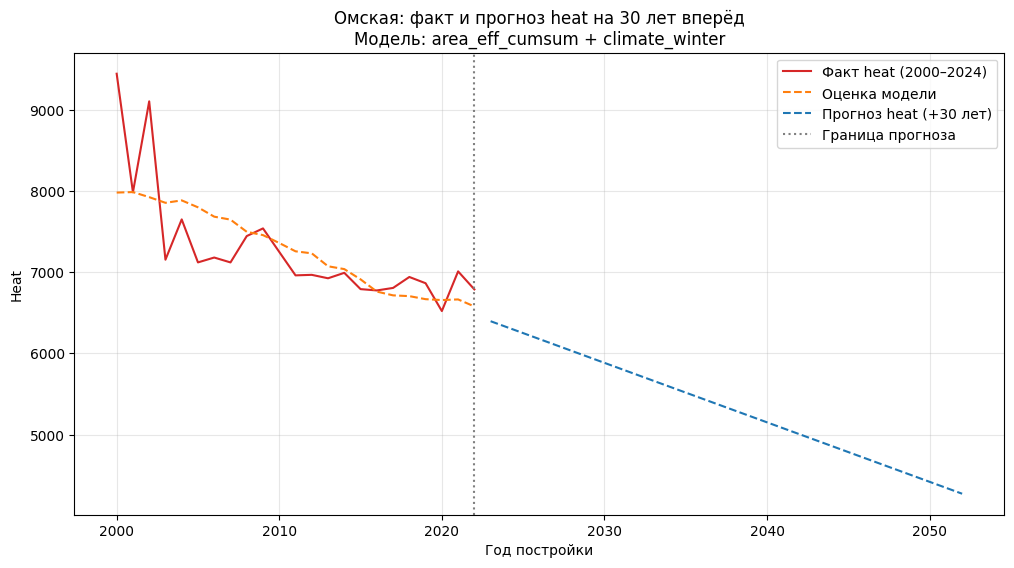

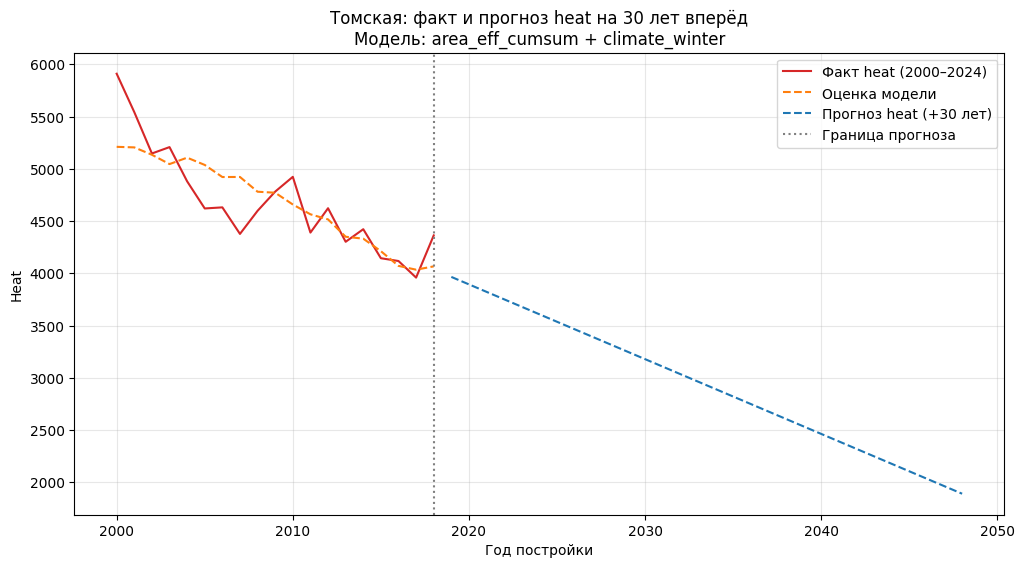

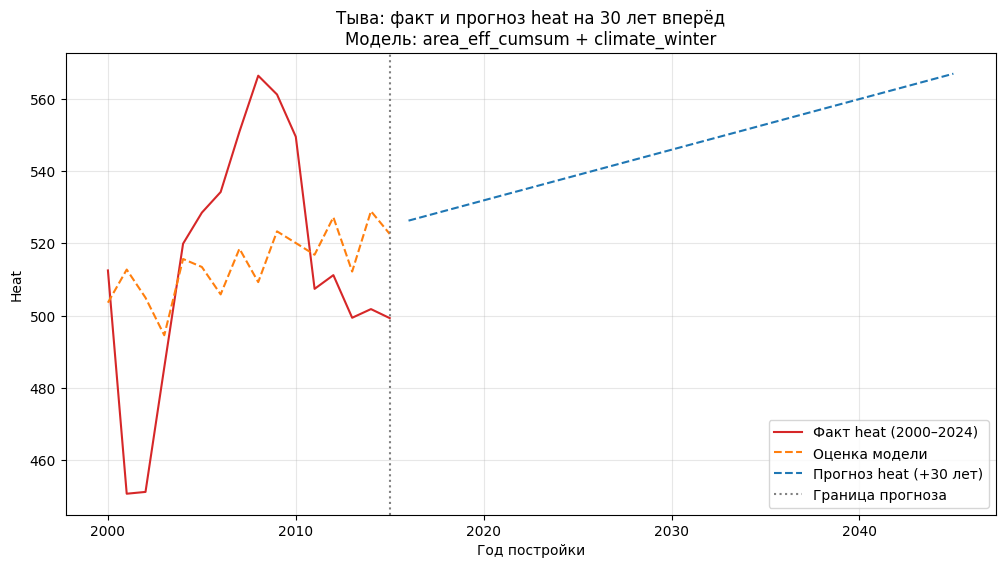

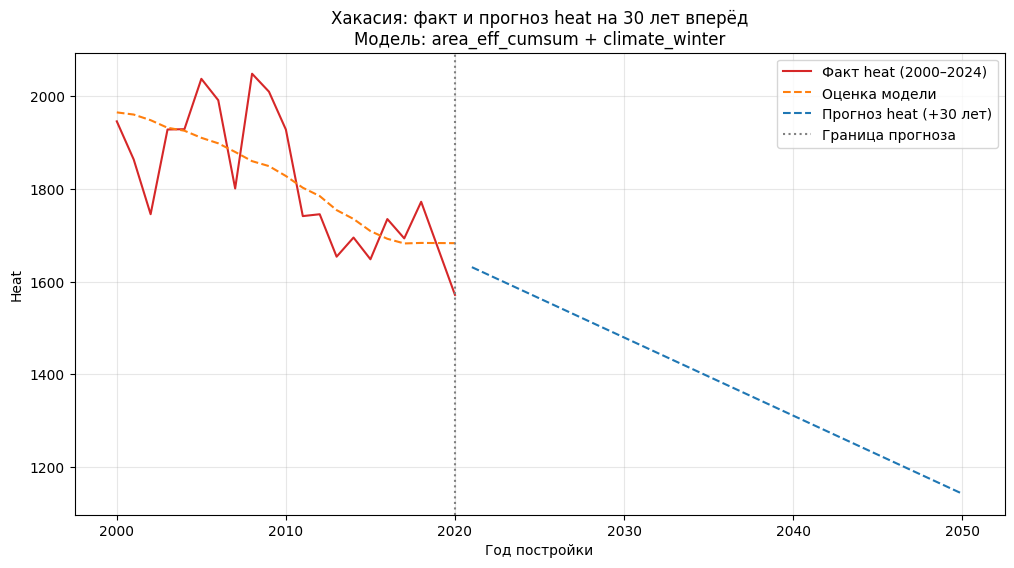

          Регион     Intercept  Coef_area_eff_cumsum  Coef_climate_winter  \
0          Алтай    474.032190             -0.000209             8.487643   
1      Алтайский  27278.645350             -0.000592           267.534840   
2      Иркутская  20690.438031             -0.000369          -311.101130   
3    Кемеровская  26658.225335             -0.000477          -512.891448   
4   Красноярский  27452.689506             -0.000236           -49.556859   
5  Новосибирская  75319.206011             -0.000492          1683.848433   
6         Омская  11510.016440             -0.000199           -71.988881   
7        Томская   8453.860828             -0.000326           -81.886208   
8           Тыва   -221.310882              0.000259           -16.590762   
9        Хакасия   3471.411478             -0.000249            -4.137534   

         R2  
0  0.695430  
1  0.780455  
2  0.608791  
3  0.815987  
4  0.602095  
5  0.628233  
6  0.498783  
7  0.667495  
8  0.072953  
9  0.503332 

In [38]:
#СФО по регионам: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

regions = df_final["formalname_region"].unique()

results = []  # сюда будем складывать коэффициенты регрессии

for region in regions:
    mask = (
        (df_final["built_year"] >= 2000)
        & (df_final["built_year"] <= 2024)
        & (df_final["formalname_region"] == region)
    )
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
        .groupby("built_year", as_index=False)
        .mean()
    )
    
    if df_yearly.empty:
        continue  # если по региону нет данных, пропускаем

    # интерполяция
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
        df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
        .interpolate(method="linear")
    )

    # регрессия
    X = df_yearly[["area_eff_cumsum", "climate_winter"]]
    y = df_yearly["heat"]
    reg = LinearRegression()
    reg.fit(X, y)

    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2": reg.score(X, y)  # качество на истории
    })

    # прогноз на 30 лет
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_data = pd.DataFrame({
        "built_year": future_years,
        "area_eff_cumsum": future_area,
        "climate_winter": future_climate
    })
    future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

    # прогноз и история
    df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

    df_all = pd.concat(
        [
            df_yearly.assign(type="Факт"),
            future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
        ],
        ignore_index=True
    )

    # график
    plt.figure(figsize=(12,6))
    hist = df_all[df_all["type"] == "Факт"]
    fut = df_all[df_all["type"] == "Прогноз"]

    plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
    plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели", color="tab:orange", linestyle="--")
    plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Собираем все коэффициенты в таблицу
df_results = pd.DataFrame(results)

# выводим
print(df_results)

# можно сохранить в Excel
#df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)


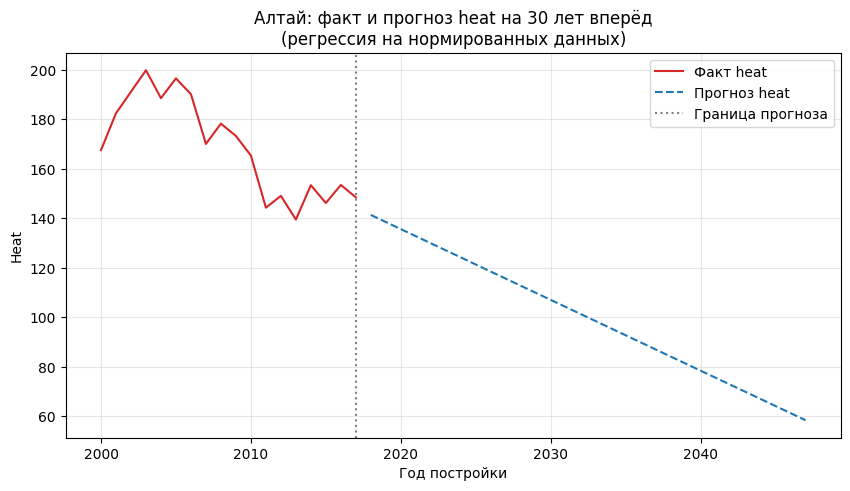

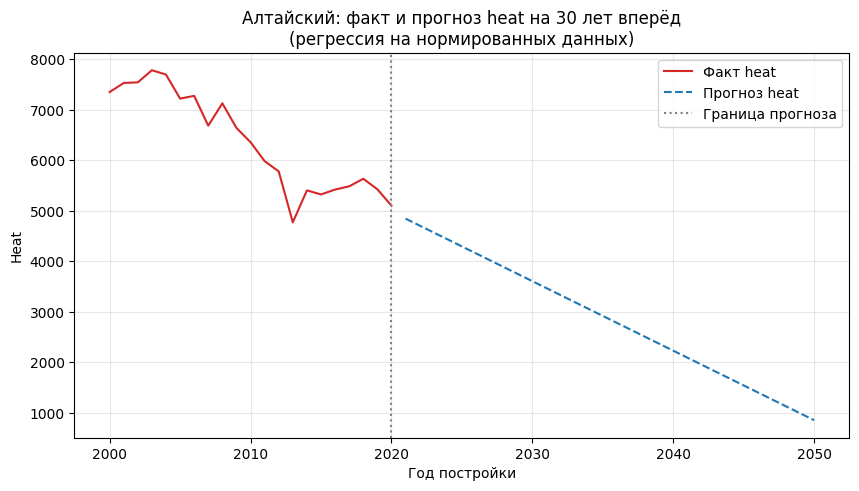

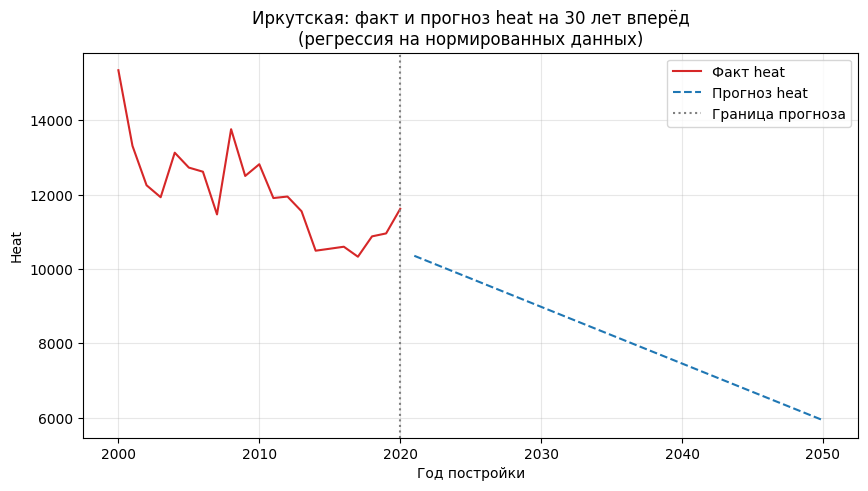

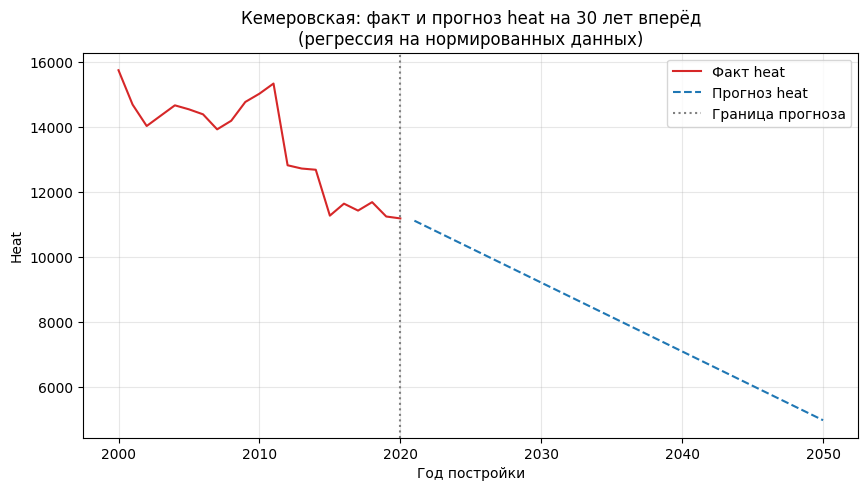

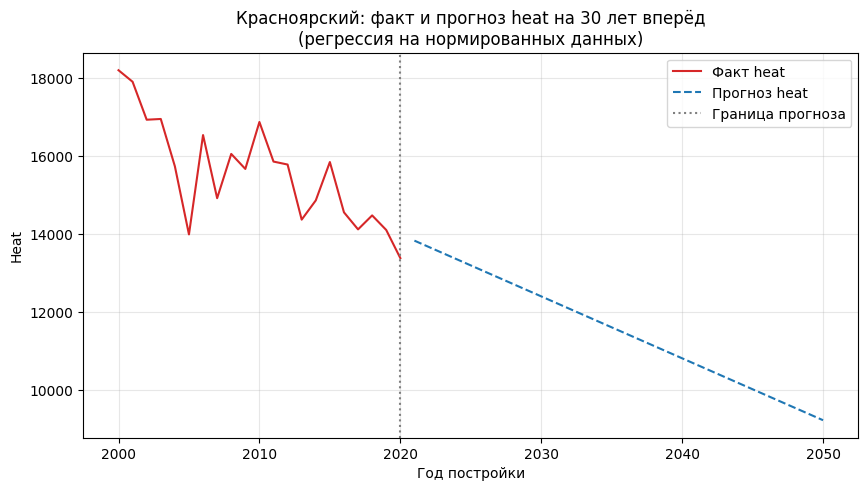

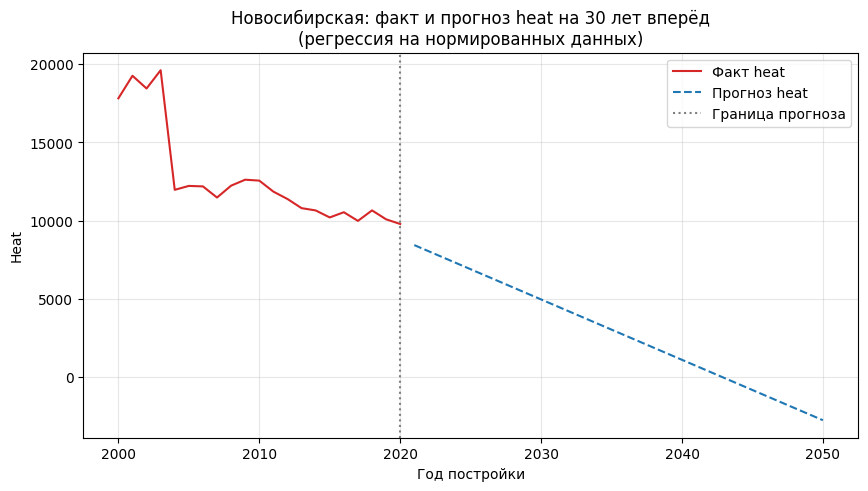

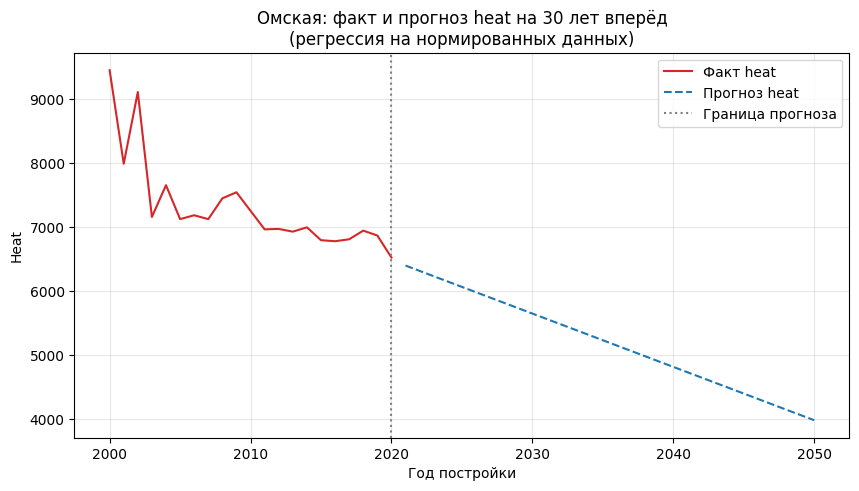

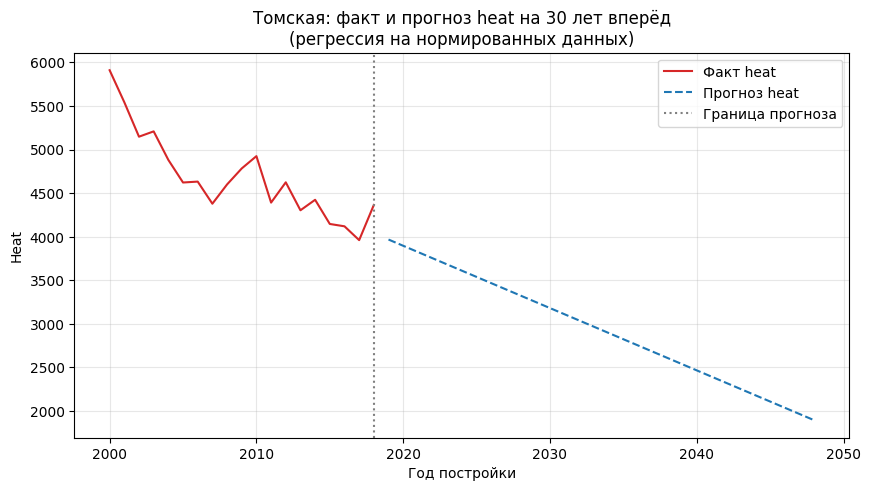

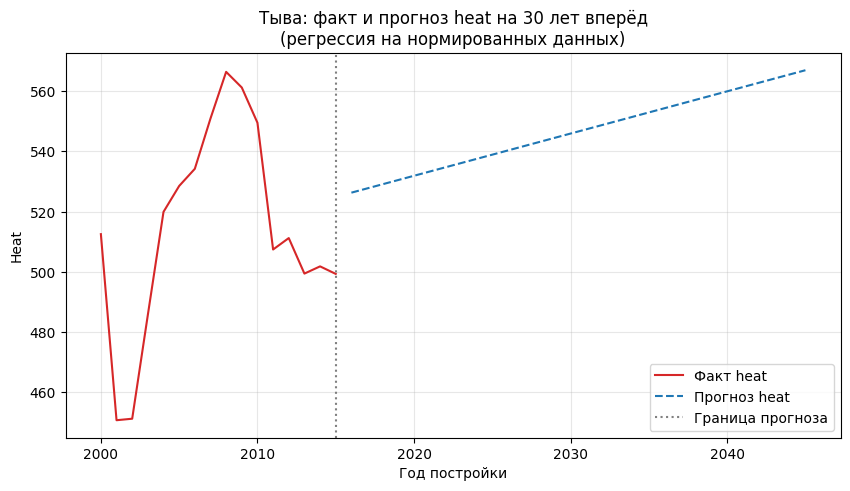

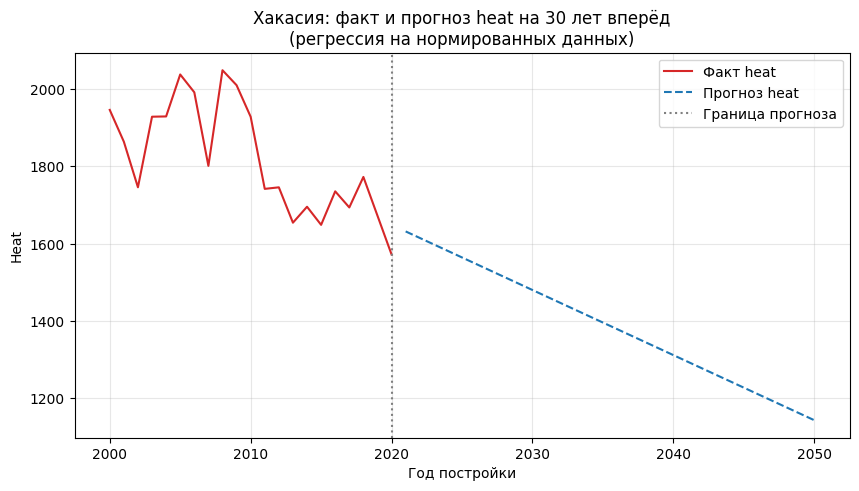

          Регион     Intercept  Coef_area_eff_cumsum  Coef_climate_winter  \
0          Алтай    167.470588            -17.555220             4.229725   
1      Алтайский   6355.550476           -960.113030           168.053401   
2      Иркутская  12032.694286           -875.754698          -119.567327   
3    Кемеровская  13459.524762          -1126.958941          -283.320589   
4   Красноярский  15581.122857           -960.343310           -14.433689   
5  Новосибирская  12684.118095          -2926.116246           930.146007   
6         Омская   7309.707619           -485.812847           -36.429098   
7        Томская   4681.415789           -374.701528           -39.821016   
8           Тыва    514.362500              7.598375            -6.342161   
9        Хакасия   1824.555000            -98.642387            -2.007711   

   R2 (на истории)  
0         0.695430  
1         0.797440  
2         0.612522  
3         0.775755  
4         0.554678  
5         0.634663  
6    

In [39]:
#СФО по регионам: регрессия нормированная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

regions = df_final["formalname_region"].unique()

results = []  # сюда сложим коэффициенты регрессий

for region in regions:
    # 1) фильтр по региону и годам
    mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2020) & \
           (df_final["formalname_region"] == region)
    
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
                .groupby("built_year", as_index=False)
                .mean()
                .sort_values("built_year")
    )
    
    if df_yearly.empty:
        continue  # пропускаем регионы без данных
    
    df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
    df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()
    
    # 2) нормировка признаков
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
    y = df_yearly["heat"].values
    
    # 3) регрессия
    reg = LinearRegression()
    reg.fit(X_scaled, y)
    
    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2 (на истории)": reg.score(X_scaled, y)
    })
    
    # 4) прогноз на 30 лет вперёд
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_scaled = scaler.transform(
        pd.DataFrame({"area_eff_cumsum": future_area,
                      "climate_winter": future_climate})
    )
    
    future_data = pd.DataFrame({
        "built_year": future_years,
        "heat": reg.predict(future_scaled),
        "type": "Прогноз"
    })

    # 5) история
    df_hist = df_yearly[["built_year", "heat"]].copy()
    df_hist["type"] = "Факт"
    
    df_all = pd.concat([df_hist, future_data], ignore_index=True).sort_values("built_year")
    
    # 6) график
    plt.figure(figsize=(10,5))
    hist = df_all[df_all["type"] == "Факт"]
    fut  = df_all[df_all["type"] == "Прогноз"]
    
    plt.plot(hist["built_year"], hist["heat"], label="Факт heat", color="tab:red")
    plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat", color="tab:blue", linestyle="--")
    
    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\n(регрессия на нормированных данных)")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# 7) таблица коэффициентов
df_results = pd.DataFrame(results)
print(df_results)

# можно сохранить в Excel:
# df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)
